In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
import calendar
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Unemployment in India.csv")

In [3]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(768, 7)

In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [6]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

As you can see there is space in starting of some features so we have to remove it

In [7]:
# Changing name of features

df.rename(columns={'Region':'States',' Date':"Date"," Frequency":"Frequency"," Estimated Unemployment Rate (%)":"Estimated Unemployment Rate (%)"," Estimated Employed":"Estimated Employed"," Estimated Labour Participation Rate (%)":"Estimated Labour Participation Rate (%)"},inplace=True)

In [8]:
df

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Drop Null Values

df.dropna(inplace=True)

In [10]:
df.isnull().sum()

States                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   States                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [12]:
# Changing Data-Type of Date

df['Date']=pd.to_datetime(df['Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   States                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


In [14]:
# extraction month and year from date feature

df['Month']=pd.to_datetime(df['Date']).dt.month
df['Year']=pd.to_datetime(df['Date']).dt.year

In [15]:
df

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,2019
...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2,2020
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,3,2020
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,4,2020
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,5,2020


In [16]:
# Convert months in words so it become simple for analysis

df['Month_Name']=df['Month'].apply(lambda x: calendar.month_abbr[x])

In [17]:
df

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year,Month_Name
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,2019,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,2019,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,2019,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,2019,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,2019,Sep
...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2,2020,Feb
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,3,2020,Mar
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,4,2020,Apr
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,5,2020,May


In [18]:
#roundoff the values

round(df.groupby(['States'])[["Estimated Unemployment Rate (%)","Estimated Employed",
"Estimated Labour Participation Rate (%)"]].mean()).sort_values(by='Estimated Unemployment Rate (%)')

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
States,,,
Meghalaya,5.0,689737.0,57.0
Assam,6.0,5354772.0,45.0
Odisha,6.0,6545747.0,39.0
Andhra Pradesh,7.0,8154093.0,39.0
Sikkim,7.0,106881.0,46.0
Gujarat,7.0,11402013.0,46.0
Madhya Pradesh,7.0,11115484.0,39.0
Uttarakhand,7.0,1390228.0,34.0
Karnataka,7.0,10667119.0,41.0


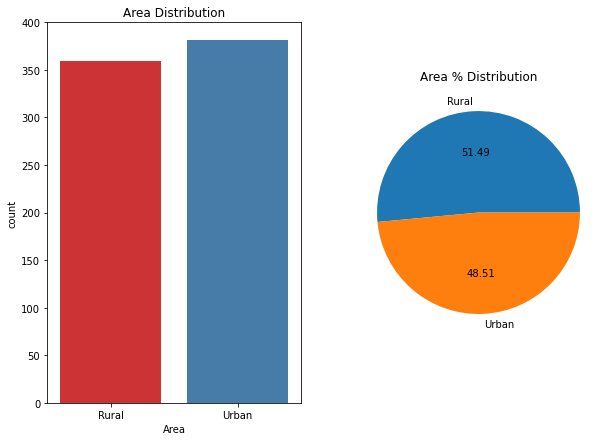

In [19]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Area Distribution")
sns.countplot(df['Area'],data=df,palette='Set1')

plt.subplot(1,2,2)
plt.title("Area % Distribution")
plt.pie(x=df['Area'].value_counts(),labels=['Rural','Urban'],autopct='%.2f');

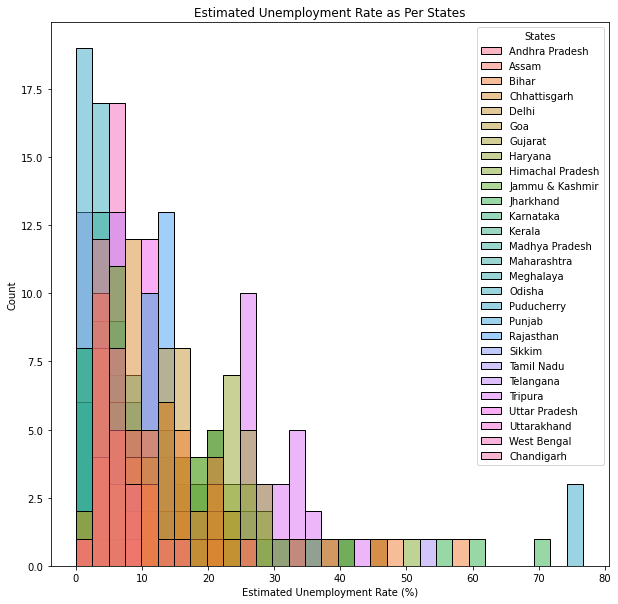

In [20]:
plt.figure(figsize=(10,10))
plt.title("Estimated Unemployment Rate as Per States")
sns.histplot(x=df["Estimated Unemployment Rate (%)"],hue='States',data=df);

In [21]:
# Average unemployement rate in each states:

X=df.groupby("States")["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False)
X

States
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Delhi               16.495357
Jammu & Kashmir     16.188571
Chandigarh          15.991667
Rajasthan           14.058214
Uttar Pradesh       12.551429
Punjab              12.031071
Puducherry          10.215000
Kerala              10.123929
Tamil Nadu           9.284286
Goa                  9.274167
Chhattisgarh         9.240357
West Bengal          8.124643
Telangana            7.737857
Maharashtra          7.557500
Andhra Pradesh       7.477143
Madhya Pradesh       7.406429
Sikkim               7.249412
Karnataka            6.676071
Gujarat              6.663929
Uttarakhand          6.582963
Assam                6.428077
Odisha               5.657857
Meghalaya            4.798889
Name: Estimated Unemployment Rate (%), dtype: float64

In [22]:
# Average unemployement rate in each Area:

x=df.groupby(['Area'])['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).to_frame()
x

,Estimated Unemployment Rate (%)
Area,
Urban,13.166614
Rural,10.324791


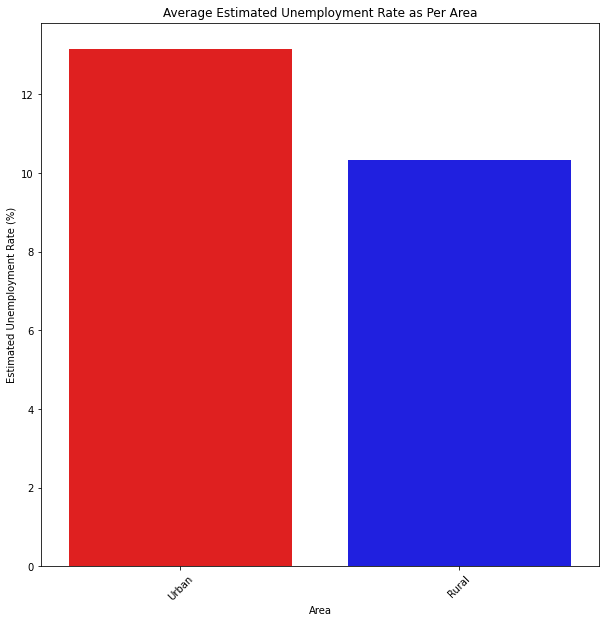

In [23]:
plt.figure(figsize=(10,10))
plt.title("Average Estimated Unemployment Rate as Per Area")
sns.barplot(x=x.index,y=x['Estimated Unemployment Rate (%)'],palette=['red','blue'],data=X)
plt.xticks(rotation=45);

In [24]:
# Average Estimated Labour Participation Rate 

x=df.groupby(['States'])['Estimated Labour Participation Rate (%)'].mean().sort_values(ascending=False).to_frame()
x

,Estimated Labour Participation Rate (%)
States,
Tripura,61.823929
Meghalaya,57.080741
Telangana,53.002500
Gujarat,46.101071
Sikkim,46.070000
West Bengal,45.417500
Assam,44.868462
Himachal Pradesh,44.222143
Chhattisgarh,42.810714


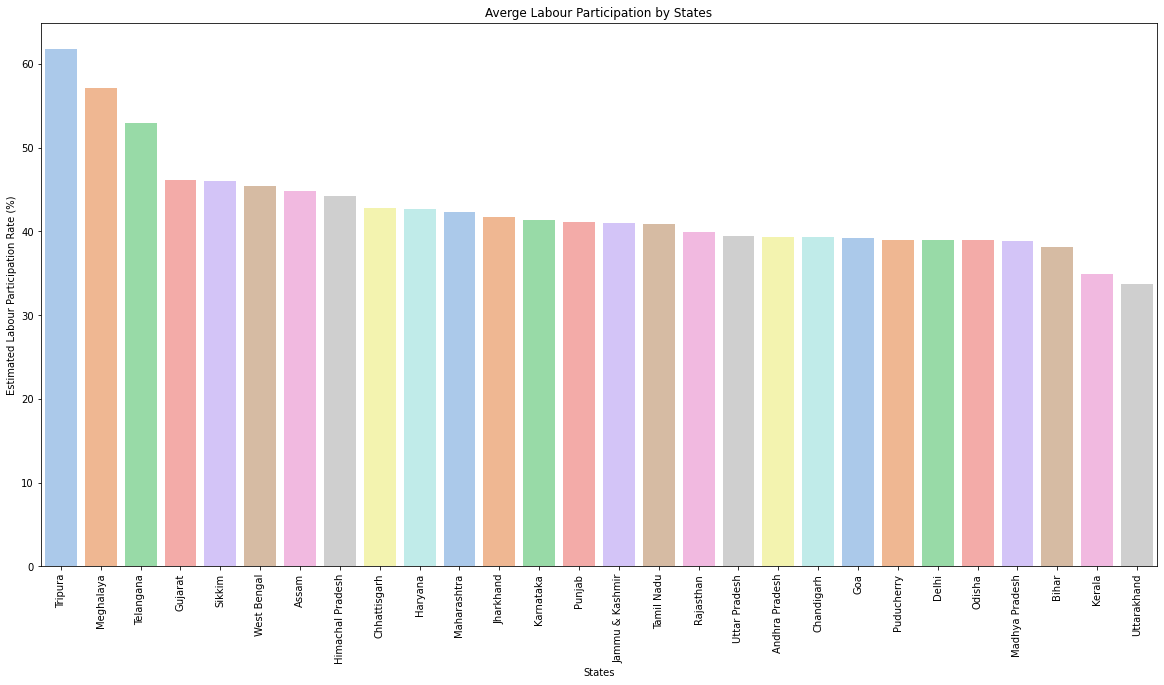

In [25]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Averge Labour Participation by States")
sns.barplot(x.index, x['Estimated Labour Participation Rate (%)'],palette='pastel',data=x);

In [26]:
# Average Estimated Labour Participation Rate as per area

x=df.groupby(['Area'])['Estimated Labour Participation Rate (%)'].mean().sort_values(ascending=False).to_frame()
x

,Estimated Labour Participation Rate (%)
Area,
Rural,44.464819
Urban,40.901365


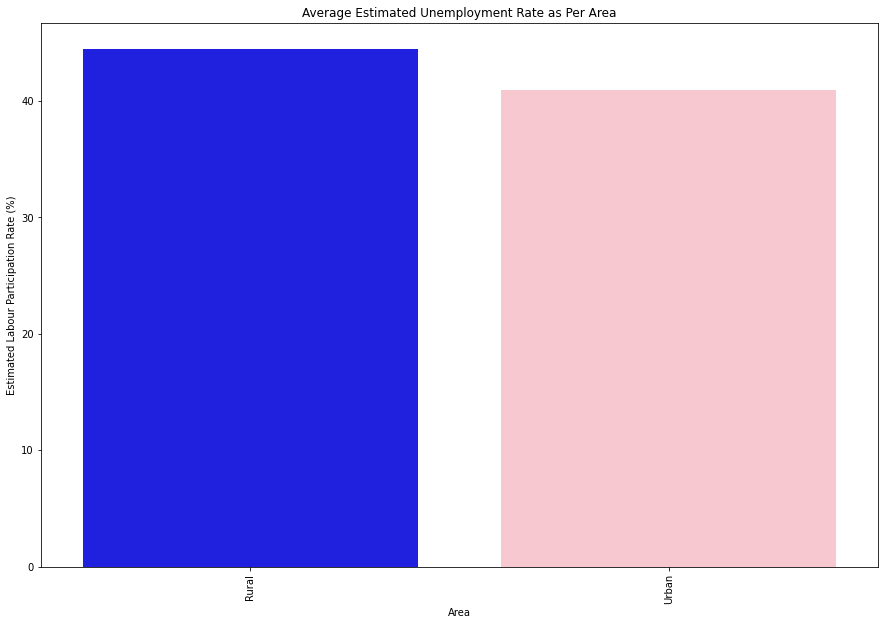

In [27]:
plt.figure(figsize=(15,10))
plt.title("Average Estimated Unemployment Rate as Per Area")
sns.barplot(x=x.index,y=x['Estimated Labour Participation Rate (%)'],palette=['blue','pink'],data=X)
plt.xticks(rotation=90);

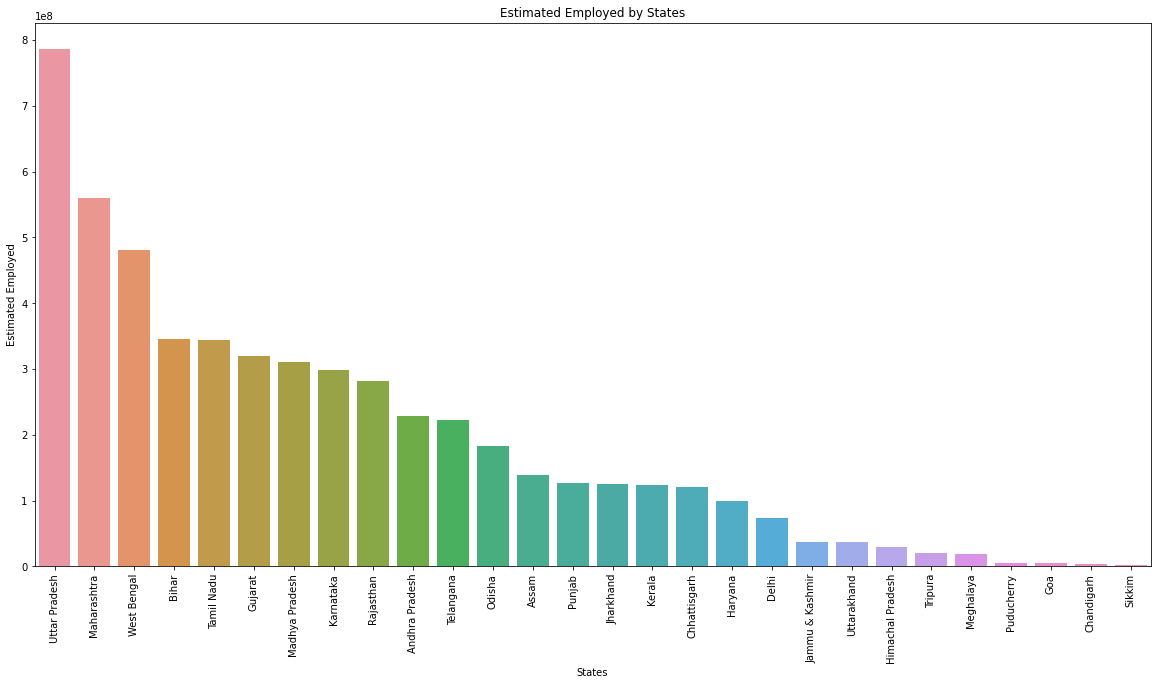

In [28]:
# Estimated employed as per state

x=df.groupby(['States'])['Estimated Employed'].sum().sort_values(ascending=False).to_frame()
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Estimated Employed by States")
sns.barplot(x.index, x['Estimated Employed'],data=x);

# Impact of COVID-19 in Unemployment Rate in India

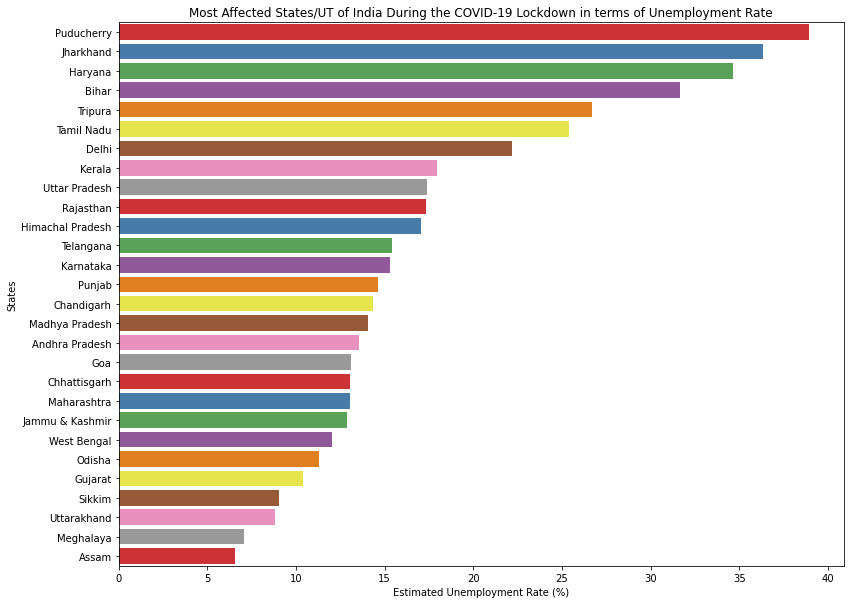

In [29]:
x = df[(df["Year"]==2020) & ((df["Date"].dt.month)>=3)]

y = x.groupby(["States"])["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(13,10))
sns.barplot(y["Estimated Unemployment Rate (%)"],y.index, palette="Set1")
plt.title("Most Affected States/UT of India During the COVID-19 Lockdown in terms of Unemployment Rate")
plt.show()